In [12]:
%matplotlib inline
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
train = pd.read_csv('src/train.csv')

# Data Exploration

In [8]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


## Let´s start analysing the target

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

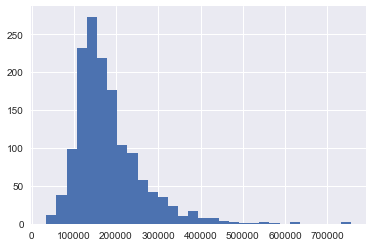

In [17]:
train['SalePrice'].hist(bins=30).plot()
plt.show()

The distribution is right skewed. Usually a log transformation is sufficient to transform this in a normal distribution. To clarify a bit more, we will follow with a Probability Plot

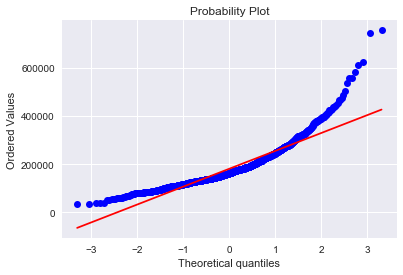

In [16]:
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Although earlier we verified that there is no price that is either negative or zero, we could continue with a simple log transformation, but we will use a log(1+x) to make the solution safer

Let's take a look at nulls

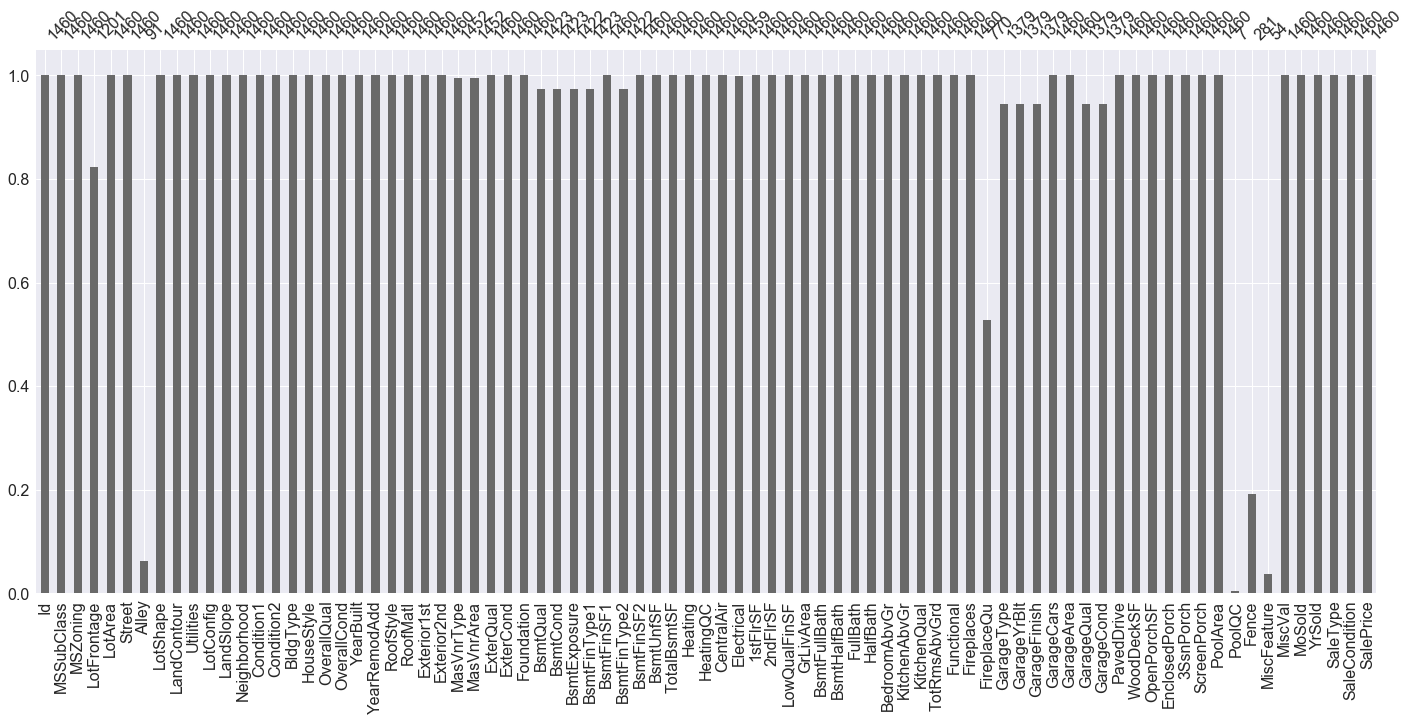

In [5]:
msno.bar(train)

According to the data_description file, some nulls makes sense. They will be investigated later

Although we have houses costing more than 700000, there is a concentration of houses with prices below 200000

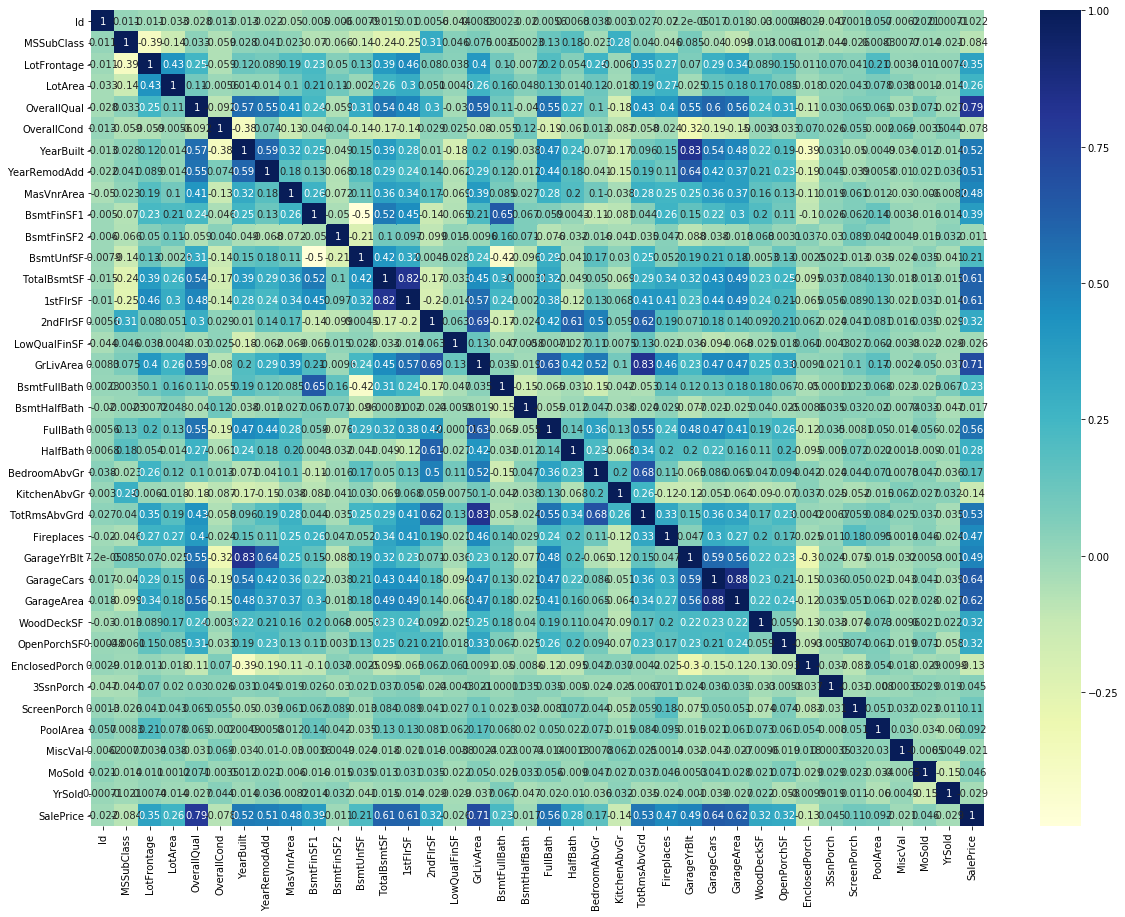

In [43]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

The correlation plot above was created only to have an idea of correlation between variables. Although we have some interesting correlations that needs to be investigated deeper, at this moment we will focus the investigation of the variables that are highly correlated with the SalesPrice.
* OverallQual
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* GarageCars
* GarageArea

In [39]:
temp = train.loc[:,['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea', 'SalePrice']]

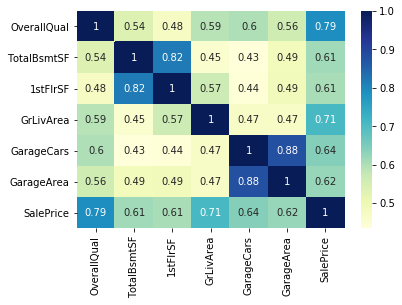

In [40]:
sns.heatmap(temp.corr(), cmap="YlGnBu", annot=True)

Looking a bit closer we can see that GarageCars and GarageArea have 0.88 correlation and this is too high. GarageCars is more correlated with SalePrice than GarageArea, so maybe it's a better predictor for SalePrice. The same occurs with TotalBsmtSF and 1stFlrSF

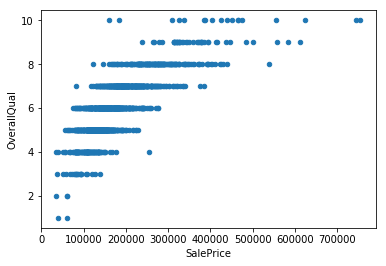

In [41]:
temp.plot(kind='scatter', x='SalePrice', y='OverallQual')

TypeError: 'str' object is not callable

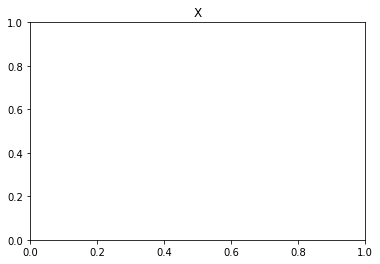

In [46]:
plt.title("X")
plt.xlabel("ASda")
plt.scatter(x=temp['SalePrice'], y=temp['OverallQual'])

In [20]:
colunas = list(temp.columns)
colunas.remove('SalePrice')

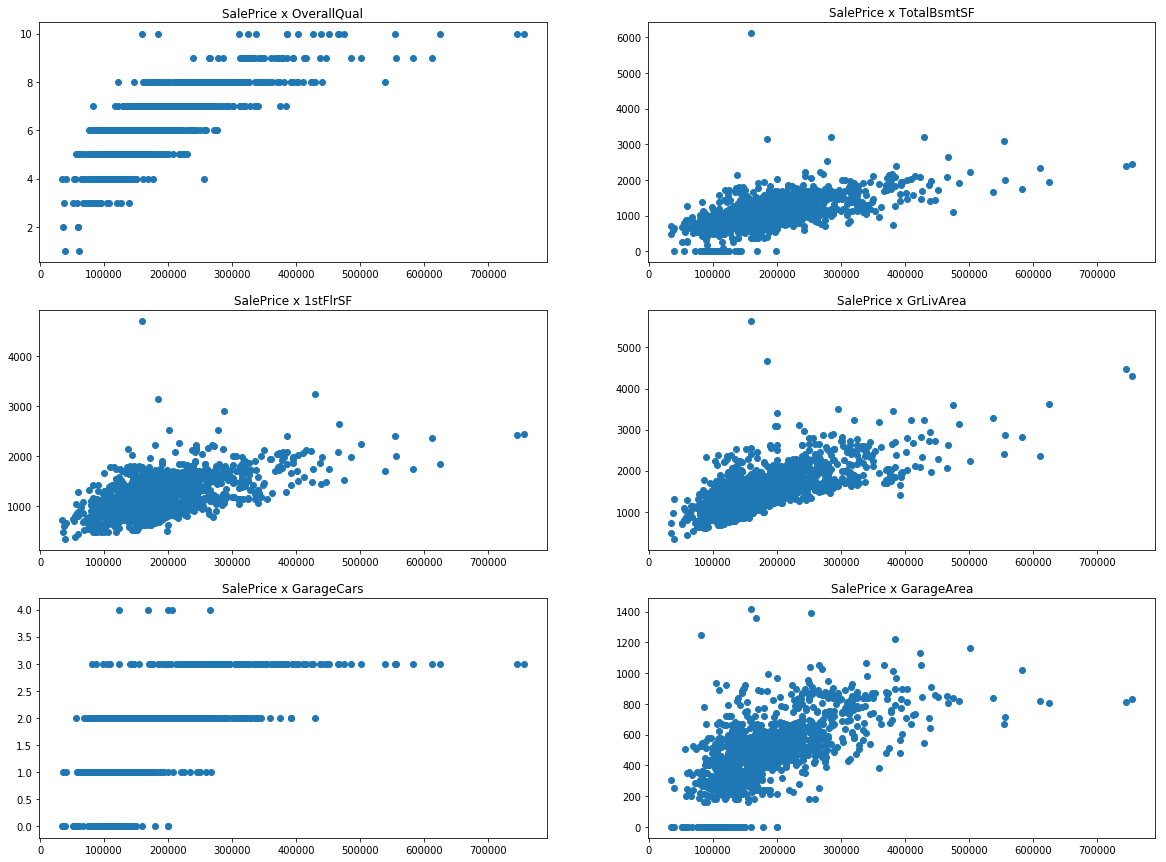

In [52]:
plt.subplots(figsize=(20,15))
for n, coluna in enumerate(colunas):
    plt.subplot(3,2,n+1)
    plt.title("SalePrice x " + coluna)
    plt.scatter(x=temp['SalePrice'], y=temp[coluna])
    
plt.show()

In [ ]:
plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()